In [5]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
# Cargar el conjunto de datos en un data frame
pd.read_csv("./covid.csv")
df = pd.read_csv("./covid.csv")

In [8]:
# Se eliminan columnas que nbo se vana a usar
delete_columns = ['id', 'patient_type', 'entry_date', 'date_symptoms', 'date_died', 'other_disease', 'icu']
df.drop(delete_columns, axis=1, inplace=True)

In [9]:
# Se filtran las filas y se eliminan las que tengan valores en 3 (los que no recibieron el resultado) en la columna (covid_res)
df = df[df['covid_res'] != 3]

# Se filtran las filas y se eliminan las que tengan valores en 99 (sin información) en la columna (contact_other_covid)
df = df[df['contact_other_covid'] != 99]

# Se filtran las filas y se eliminan las que tengan valores en 98 (sin información) en la columna (renal_chronic)
df = df[df['renal_chronic'] != 98]

# Se filtran las filas y se eliminan las que tengan valores en 98 (sin información) en la columna (obesity)
df = df[df['obesity'] != 98]

# Se filtran las filas y se eliminan las que tengan valores en 98 (sin información) en la columna (tobacco)
df = df[df['tobacco'] != 98]

# Se filtran las filas y se eliminan las que tengan valores en 98 (sin información) en la columna (cardiovascular)
df = df[df['cardiovascular'] != 98]

# Se filtran las filas y se eliminan las que tengan valores en 98 (sin información) en la columna (hypertension)
df = df[df['hypertension'] != 98]

# Se filtran las filas y se eliminan las que tengan valores en 98 (sin información) en la columna (inmsupr)
df = df[df['inmsupr'] != 98]

# Se filtran las filas y se eliminan las que tengan valores en 98 (sin información) en la columna (asthma)
df = df[df['asthma'] != 98]

# Se filtran las filas y se eliminan las que tengan valores en 98 (sin información) en la columna (copd)
df = df[df['copd'] != 98]

# Se filtran las filas y se eliminan las que tengan valores en 97 (sin información) en la columna (copd)
df = df[df['pregnancy'] != 97]

# Se filtran las filas y se eliminan las que tengan valores en 99 (sin información) en la columna (pneumonia)
df = df[df['pneumonia'] != 99]

# Se filtran las filas y se eliminan las que tengan valores en 97 (sin información) en la columna (intubed)
df = df[df['intubed'] != 97]

In [10]:
# Se separan las características de la variable objetivo
X = df.drop('covid_res', axis=1)
y = df['covid_res']

In [11]:
# Dividir el conjunto de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
# Se crea un modelo k vecinos más cercanos
modelo = KNeighborsClassifier(n_neighbors = 5)
modelo.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
# Evaluar el modelo de conjunto de datos de prueba para hacer predicciones
y_pred = modelo.predict(X_test)

C:\Users\rmusr0002\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [14]:
# Evaluar el desempeño del modelo
precision = accuracy_score(y_test, y_pred)
print("La precisión del modelo es:", precision)

La precisión del modelo es: 0.6313319307331283


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Definir las columnas que se utilizarán como características
features = ['sex', 'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',]

# Se define la columna objetivo
target = 'covid_res'

# Se divide el conjunto de datos en características x y objetivo y
X = df[features]
y = df[target]

# Dividir los datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Crear clasificación KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar la clasificación
knn.fit(X_train, y_train)

# Hacer predicciones de prueba
y_pred = knn.predict(X_test)

# Se crea la matriz de confusión
matriz = confusion_matrix(y_test, y_pred)

print(matriz)

[[2762  825]
 [1453 1139]]


C:\Users\rmusr0002\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


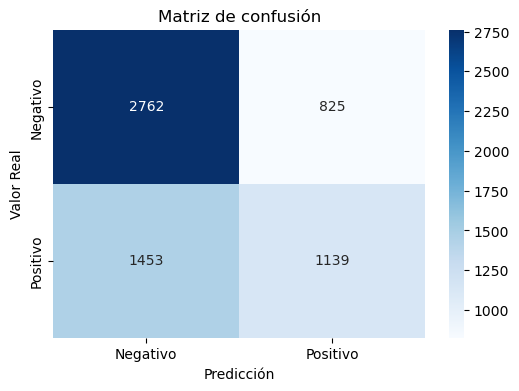

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura para la matriz de confusión
fig, ax = plt.subplots(figsize = (6, 4))

# Se crea la matriz de confusión utilizando la función heatmap (seaborn)
sns.heatmap(matriz, annot = True, cmap = "Blues", fmt = "d", xticklabels = ["Negativo", "Positivo"], yticklabels = ["Negativo", "Positivo"])

# Configurar las etiquetas ejes
ax.set_xlabel('Predicción')
ax.set_ylabel('Valor Real')
ax.set_title('Matriz de confusión')

# Mostrar la figura
plt.show()